# DMML exam: 2024-02-21

The Framingham dataset stems from a cardiovascular study on residents of the town of Framingham, Massachusetts, US.

The **classification goal** is to predict whether the patient has **10-year risk of future coronary heart disease** (CHD) based on the following attributes:

- Demographic:
    - *Male*: {0,1}
    - *Age*: Age of the patient
- Behavioral:
    - *Current Smoker*: whether or not the patient is a current smoker {0,1}
    - *Cigs Per Day*: the number of cigarettes that the person smoked on average in one day.
- Information on medical history:
    - *BP Meds*: whether or not the patient was on blood pressure medication {0,1}
    - *Prevalent Stroke*: whether or not the patient had previously had a stroke {0,1}
    - *Prevalent Hyp*: whether or not the patient was hypertensive {0,1}
    - *Diabetes*: whether or not the patient had diabetes {0,1}
- Information on current medical condition:
    - *Tot Chol*: total cholesterol level 
    - *Sys BP*: systolic blood pressure 
    - *Dia BP*: diastolic blood pressure 
    - *BMI*: Body Mass Index 
    - *Heart Rate*: heart rate
    - *Glucose*: glucose level 
- Target variable to predict:
    - *TenYearCHD*: 10 year risk of coronary heart disease (CHD) {0=NO,1=YES}

# Instructions summary
1. Import the training set: *framingham_train.csv*
2. Perform an **exploratory analysis**:
    - Report and discuss the results of the analysis
3. Perform the **required preprocessing steps** and carry out a **classification analysis** aimed at predicting the **TenYearCHD** considering the following setting:
    - Apply a 10-fold cross-validation procedure on the dataset to identify the most suitable classifier among the following:
        - KNearestNeighbor classifier (default params)
        - KNearestNeighbor classifier (default params) after feature selection targeted at keeping 4 features.
    - Report and discuss the results, motivating the choice of the most suitable model.
4. Evaluate and discuss results on the test set:
    - Train the selected model on the training set: *framingham_train.csv*
    - Import the test set: *framingham_test.csv*
    - Report and discuss the results on the test set

**Note**: use markdown cells to provide discussion on code output.

# Exam Delivery
- Save the current file 
- Click "**Restart & Run All**" and check consistency (no error, expected results)
- Export using
     - "**File**" --> "**Download as**" --> "**HTML (.html)**"
- Rename the files as follows and upload in MS Teams Assignment
     - HTML: *Surname_Name_StudentNumber.html*
     - IPYNB: *Surname_Name_StudentNumber.ipynb* 
     
# Code of conduct
- You can consult the course material (notebooks and slides)
- You can consult the official documentation of the libraries
- You cannot use generative AI tools (e.g., ChatGPT)
- Any form of information leakage between candidates is not allowed: if this is ascertained, exam failure is automatic.


# 1. Import the training set: *framingham_train.csv*



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from collections import Counter
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import jaccard_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist
from pandas.plotting import scatter_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier

In [2]:
df= pd.read_csv('framingham_train.csv')
df

,Unnamed: 0,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,4227,1,43,1,20.0,0.0,0,0,0,187.0,129.5,88.0,25.62,80.0,75.0,0
1,1811,1,43,1,20.0,0.0,0,0,0,180.0,131.0,92.0,27.18,65.0,85.0,1
2,3301,0,40,1,20.0,0.0,0,0,0,165.0,101.0,59.0,23.06,60.0,76.0,0
3,1203,1,64,1,30.0,0.0,0,1,0,253.0,178.0,106.0,24.68,100.0,76.0,1
4,2615,0,47,1,9.0,0.0,0,0,0,214.0,118.0,72.0,24.08,60.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387,1033,0,44,0,0.0,0.0,0,1,0,187.0,122.0,83.0,30.40,85.0,75.0,0
3388,3264,0,51,1,2.0,0.0,0,0,0,261.0,127.0,81.0,20.24,75.0,96.0,0
3389,1653,1,39,1,20.0,0.0,0,0,0,148.0,101.0,62.0,24.47,70.0,81.0,0
3390,2607,0,57,0,0.0,0.0,0,1,0,382.0,133.0,77.0,24.27,75.0,81.0,0


# 2. Perform an **exploratory analysis**
- Report and discuss the results of the analysis.



In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,43,1,20.0,0.0,0,0,0,187.0,129.5,88.0,25.62,80.0,75.0,0
1,1,43,1,20.0,0.0,0,0,0,180.0,131.0,92.0,27.18,65.0,85.0,1
2,0,40,1,20.0,0.0,0,0,0,165.0,101.0,59.0,23.06,60.0,76.0,0
3,1,64,1,30.0,0.0,0,1,0,253.0,178.0,106.0,24.68,100.0,76.0,1
4,0,47,1,9.0,0.0,0,0,0,214.0,118.0,72.0,24.08,60.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387,0,44,0,0.0,0.0,0,1,0,187.0,122.0,83.0,30.40,85.0,75.0,0
3388,0,51,1,2.0,0.0,0,0,0,261.0,127.0,81.0,20.24,75.0,96.0,0
3389,1,39,1,20.0,0.0,0,0,0,148.0,101.0,62.0,24.47,70.0,81.0,0
3390,0,57,0,0.0,0.0,0,1,0,382.0,133.0,77.0,24.27,75.0,81.0,0


In [4]:
df.shape

(3392, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3392 entries, 0 to 3391
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3392 non-null   int64  
 1   age              3392 non-null   int64  
 2   currentSmoker    3392 non-null   int64  
 3   cigsPerDay       3367 non-null   float64
 4   BPMeds           3392 non-null   float64
 5   prevalentStroke  3392 non-null   int64  
 6   prevalentHyp     3392 non-null   int64  
 7   diabetes         3392 non-null   int64  
 8   totChol          3351 non-null   float64
 9   sysBP            3392 non-null   float64
 10  diaBP            3392 non-null   float64
 11  BMI              3376 non-null   float64
 12  heartRate        3391 non-null   float64
 13  glucose          3082 non-null   float64
 14  TenYearCHD       3392 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 397.6 KB


In [6]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3392.000000,3392.000000,3392.000000,3367.000000,3392.000000,3392.000000,3392.000000,3392.000000,3351.000000,3392.000000,3392.000000,3376.000000,3391.000000,3082.000000,3392.000000
mean,0.430719,49.620578,0.494693,8.893971,0.029186,0.005896,0.310142,0.025649,237.013727,132.360702,82.932488,25.844286,75.810675,81.963011,0.152712
std,0.495250,8.600520,0.500046,11.807668,0.168353,0.076571,0.462620,0.158108,44.580986,22.119311,11.952236,4.129816,12.024980,23.860012,0.359763
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,116.500000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.420000,75.000000,78.000000,0.000000
75%,1.000000,57.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,143.500000,90.000000,28.090000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,248.000000,142.500000,56.800000,140.000000,394.000000,1.000000


I see that some variables, like the number of cigarettes per day and glucose levels, present some maximum values too high

<Axes: >

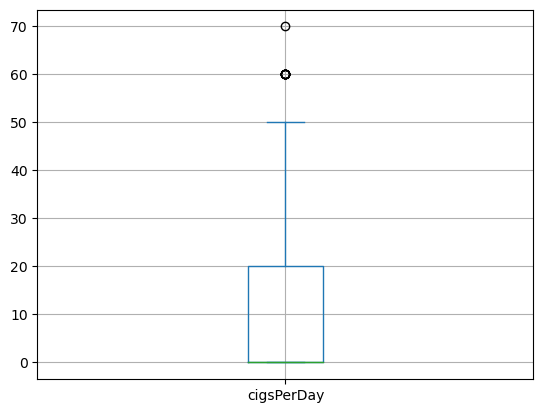

In [7]:
df['cigsPerDay'].plot(kind='box', grid=True)

<Axes: >

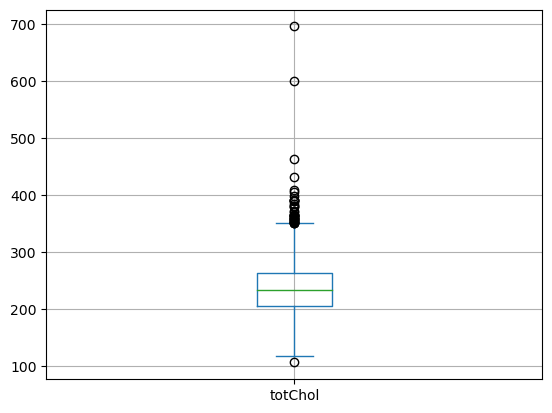

In [8]:
df['totChol'].plot(kind='box', grid=True)

In [9]:
df['totChol'].describe()

count    3351.000000
mean      237.013727
std        44.580986
min       107.000000
25%       206.000000
50%       234.000000
75%       264.000000
max       696.000000
Name: totChol, dtype: float64

<Axes: >

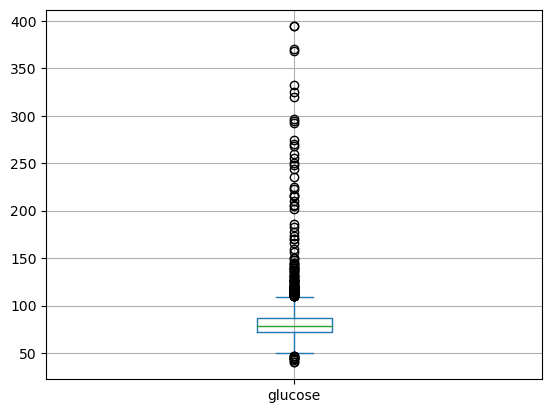

In [10]:
df['glucose'].plot(kind='box', grid=True)

In [11]:
df_train= df.drop(['TenYearCHD'], axis=1)

In [12]:
df_train.corr()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
male,1.000000,-0.024763,0.190829,0.312864,-0.051785,-0.012554,0.002424,0.009519,-0.072904,-0.031698,0.059765,0.073538,-0.122876,0.011569
age,-0.024763,1.000000,-0.220546,-0.197117,0.138814,0.058925,0.320794,0.104098,0.273190,0.404925,0.215574,0.144888,-0.007815,0.131007
currentSmoker,0.190829,-0.220546,1.000000,0.767123,-0.052456,-0.037692,-0.111439,-0.044903,-0.052341,-0.127624,-0.113077,-0.174366,0.075966,-0.056668
cigsPerDay,0.312864,-0.197117,0.767123,1.000000,-0.051153,-0.033681,-0.066241,-0.031677,-0.029316,-0.079888,-0.054412,-0.086334,0.084433,-0.052669
BPMeds,-0.051785,0.138814,-0.052456,-0.051153,1.000000,0.101027,0.258596,0.049421,0.072381,0.251258,0.183587,0.110496,-0.000474,0.057381
prevalentStroke,-0.012554,0.058925,-0.037692,-0.033681,0.101027,1.000000,0.064911,0.011863,0.001019,0.059771,0.047480,0.026451,-0.011920,0.025872
prevalentHyp,0.002424,0.320794,-0.111439,-0.066241,0.258596,0.064911,1.000000,0.088770,0.181501,0.698902,0.616188,0.306968,0.152106,0.093562
diabetes,0.009519,0.104098,-0.044903,-0.031677,0.049421,0.011863,0.088770,1.000000,0.047580,0.123417,0.057407,0.109562,0.066159,0.602597
totChol,-0.072904,0.273190,-0.052341,-0.029316,0.072381,0.001019,0.181501,0.047580,1.000000,0.217633,0.168294,0.118371,0.083459,0.045832
sysBP,-0.031698,0.404925,-0.127624,-0.079888,0.251258,0.059771,0.698902,0.123417,0.217633,1.000000,0.782717,0.320597,0.191830,0.157387


<Axes: >

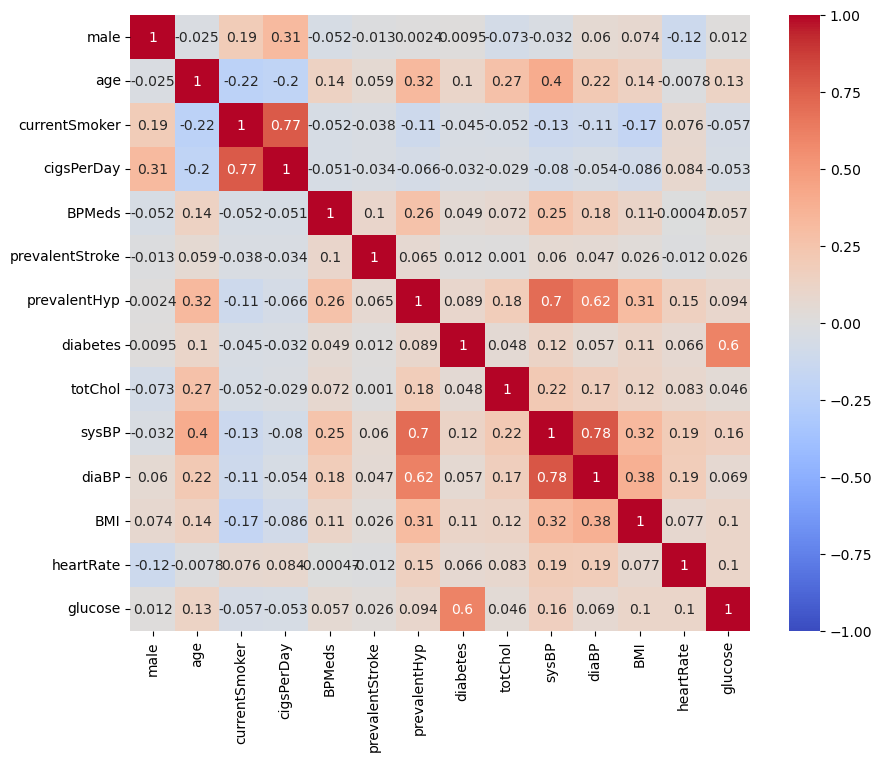

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

In [14]:
df_train.isna().any()

male               False
age                False
currentSmoker      False
cigsPerDay          True
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
dtype: bool

In [15]:
df_train.isna().sum(axis=0)

male                 0
age                  0
currentSmoker        0
cigsPerDay          25
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             41
sysBP                0
diaBP                0
BMI                 16
heartRate            1
glucose            310
dtype: int64

In [16]:
print(df_train['cigsPerDay'].value_counts())
print(df_train['totChol'].value_counts())
print(df_train['BMI'].value_counts())
print(df_train['heartRate'].value_counts())
print(df_train['glucose'].value_counts())

cigsPerDay
0.0     1714
20.0     582
15.0     172
30.0     165
10.0     118
9.0      116
5.0       99
3.0       81
40.0      61
1.0       54
25.0      46
43.0      41
35.0      17
2.0       13
8.0       10
6.0       10
7.0       10
4.0        9
60.0       9
18.0       5
50.0       5
23.0       5
17.0       5
11.0       5
45.0       3
12.0       3
19.0       2
16.0       2
14.0       1
38.0       1
70.0       1
13.0       1
29.0       1
Name: count, dtype: int64
totChol
240.0    67
220.0    56
210.0    51
260.0    47
200.0    47
         ..
331.0     1
392.0     1
350.0     1
129.0     1
696.0     1
Name: count, Length: 237, dtype: int64
BMI
23.48    16
22.54    16
22.19    15
22.91    15
25.09    14
         ..
35.13     1
22.39     1
28.72     1
34.13     1
30.40     1
Name: count, Length: 1264, dtype: int64
heartRate
75.0     455
80.0     301
70.0     239
85.0     182
60.0     181
        ... 
140.0      1
46.0       1
130.0      1
44.0       1
51.0       1
Name: count, Length: 72, d

In [17]:
print(df_train['cigsPerDay'].mean())
print(df_train['totChol'].mean())
print(df_train['BMI'].mean())
print(df_train['heartRate'].mean())
print(df_train['glucose'].mean())

8.893970893970893
237.01372724559832
25.844286137440758
75.81067531701564
81.96301103179754


In [18]:
df_train['cigsPerDay'].fillna(df_train['cigsPerDay'].mean(), inplace=True)
df_train['totChol'].fillna(df_train['totChol'].mean(), inplace=True)
df_train['BMI'].fillna(df_train['BMI'].mean(), inplace=True)
df_train['heartRate'].fillna(df_train['heartRate'].mean(), inplace=True)
df_train['glucose'].fillna(df_train['glucose'].mean(), inplace=True)

In [19]:
df_train.isna().any()

male               False
age                False
currentSmoker      False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
dtype: bool

In [20]:
df_train.nunique()

male                  2
age                  39
currentSmoker         2
cigsPerDay           34
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             238
sysBP               227
diaBP               143
BMI                1265
heartRate            73
glucose             131
dtype: int64

In [21]:
#another way
imputer= SimpleImputer(strategy= 'mean')
df_train_imputed= imputer.fit_transform(df_train)

In [22]:
df_t=pd.DataFrame(df_train_imputed, columns= df_train.columns)
df_t

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,43.0,1.0,20.0,0.0,0.0,0.0,0.0,187.0,129.5,88.0,25.62,80.0,75.000000
1,1.0,43.0,1.0,20.0,0.0,0.0,0.0,0.0,180.0,131.0,92.0,27.18,65.0,85.000000
2,0.0,40.0,1.0,20.0,0.0,0.0,0.0,0.0,165.0,101.0,59.0,23.06,60.0,76.000000
3,1.0,64.0,1.0,30.0,0.0,0.0,1.0,0.0,253.0,178.0,106.0,24.68,100.0,76.000000
4,0.0,47.0,1.0,9.0,0.0,0.0,0.0,0.0,214.0,118.0,72.0,24.08,60.0,81.963011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387,0.0,44.0,0.0,0.0,0.0,0.0,1.0,0.0,187.0,122.0,83.0,30.40,85.0,75.000000
3388,0.0,51.0,1.0,2.0,0.0,0.0,0.0,0.0,261.0,127.0,81.0,20.24,75.0,96.000000
3389,1.0,39.0,1.0,20.0,0.0,0.0,0.0,0.0,148.0,101.0,62.0,24.47,70.0,81.000000
3390,0.0,57.0,0.0,0.0,0.0,0.0,1.0,0.0,382.0,133.0,77.0,24.27,75.0,81.000000


In [23]:
df_t.isna().any()

male               False
age                False
currentSmoker      False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
dtype: bool

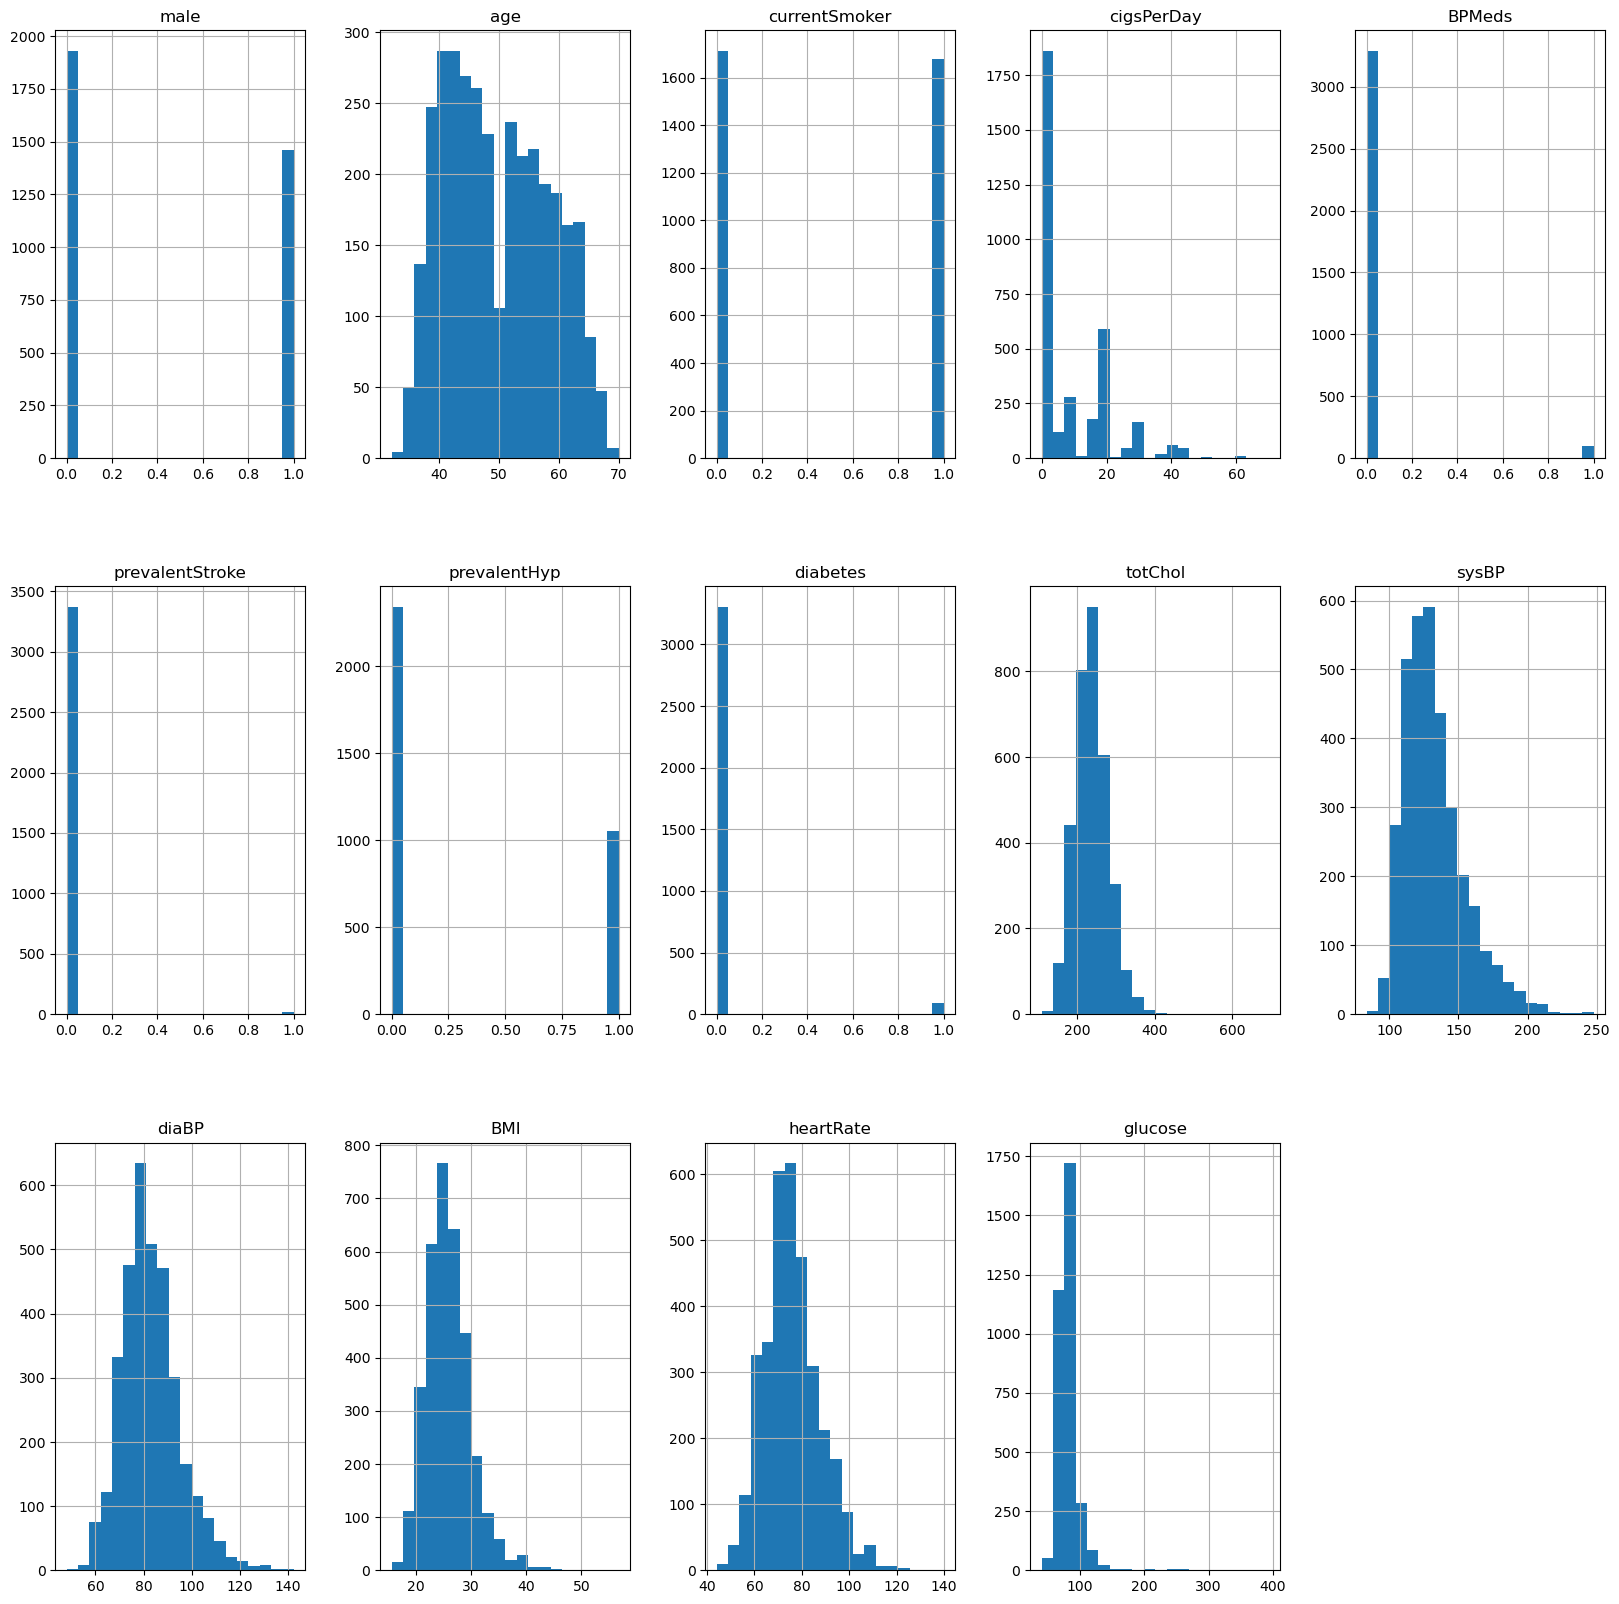

In [24]:
df_train.hist(bins = 20, layout = (3,5), figsize = (20,20))
plt.show()

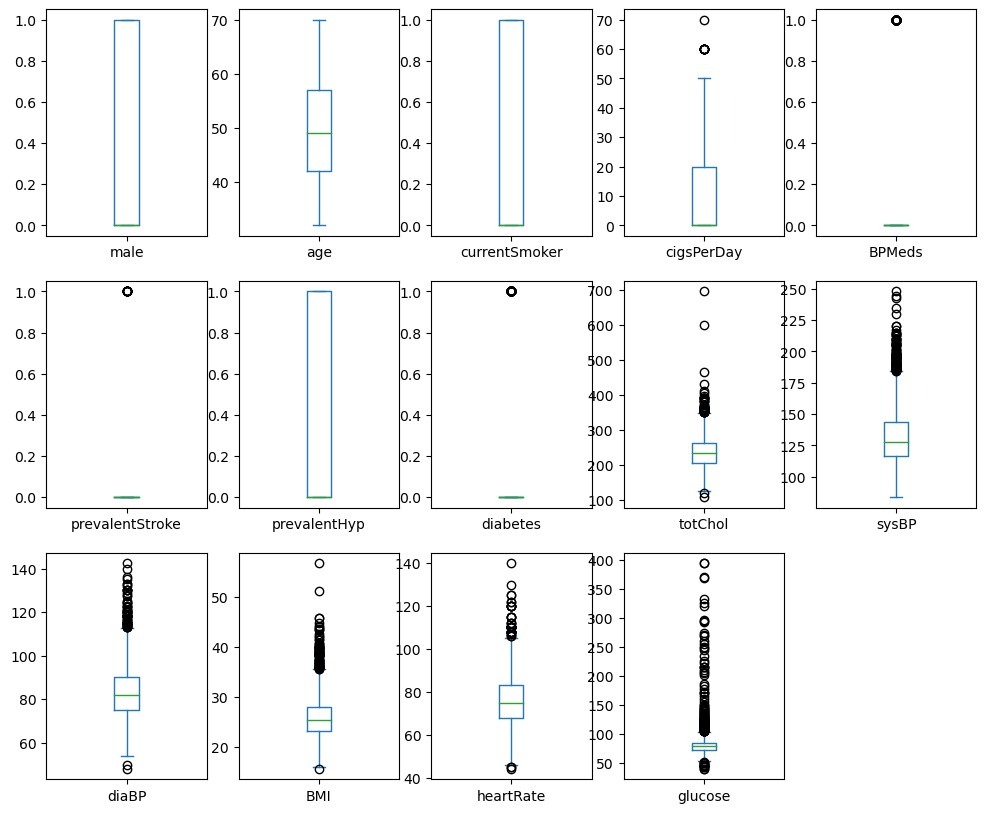

In [25]:
df_train.plot(kind = "box", subplots = True, layout = (3,5), figsize = (12,10))
plt.show()

<Axes: ylabel='Frequency'>

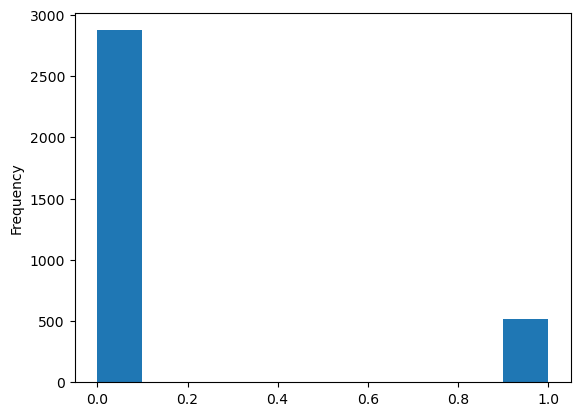

In [26]:
df['TenYearCHD'].plot(kind='hist')

<Axes: ylabel='count'>

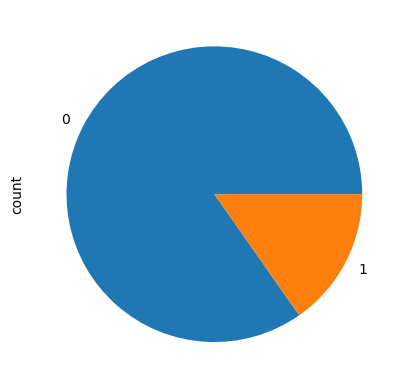

In [27]:
df['TenYearCHD'].value_counts().plot(kind='pie')

# 3. Perform the **required preprocessing steps** and carry out a **classification analysis** aimed at predicting the **microorganism** considering the following setting:
- Apply a 10-fold cross-validation procedure on the dataset to identify the most suitable classifier among the following:
    - KNearestNeighbor classifier (default params)
    - KNearestNeighbor classifier (default params) after feature selection targeted at keeping 4 features
- Report and discuss the results, motivating the choice of the most suitable model

### The data should be standardized before classification

In [28]:
X, y= df.drop(['TenYearCHD'], axis=1), df['TenYearCHD']

In [29]:
def eval_cross_validation(pipeline, X, y):
    list_df = []
    list_accuracy = []
    for train, val in skf.split(X, y):
        # fit and predict using pipeline
        X_tr = X.values[train]#9 k-1
        y_tr = y.values[train]
        X_val = X.values[val]#1
        y_val = y.values[val]
        pipeline.fit(X_tr,y_tr)
        y_pred = pipeline.predict(X_val)
        # compute classification report
        cr = classification_report(y_val, y_pred, output_dict = True, zero_division = np.nan)
        # store accuracy
        list_accuracy.append(cr['accuracy'])
        # store per-class metrics as a dataframe
        df = pd.DataFrame({k:v for k,v in cr.items() if k!='accuracy'})
        list_df.append(df)
    
    # compute average per-class metrics    
    df_concat = pd.concat(list_df)
    by_row_index = df_concat.groupby(df_concat.index)
    df_avg = by_row_index.mean().round(3)

    # compute average accuracy
    accuracy_avg = np.mean(list_accuracy)
    
    return df_avg, accuracy_avg

In [30]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, make_scorer, f1_score, recall_score
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict, StratifiedKFold
skf= StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

Accuracy for knn is:  0.6447440569148013


,0,1,macro avg,weighted avg
f1-score,0.761,0.311,0.536,0.692
precision,0.886,0.221,0.554,0.785
recall,0.666,0.525,0.596,0.645
support,287.400,51.800,339.200,339.200


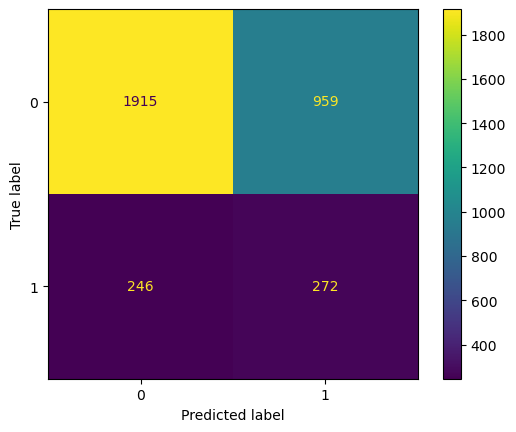

In [31]:
from imblearn.pipeline import Pipeline
estimators=[('missing', SimpleImputer(strategy='mean')),
           ('scaling', StandardScaler()),
           ('sampling', SMOTE(random_state=123)),
           ('clf', KNeighborsClassifier())]
pipe_knn= Pipeline(estimators)
df_metrics, acc= eval_cross_validation(pipe_knn, X, y)

print('Accuracy for knn is: ', acc)
display(df_metrics)
y_pred= cross_val_predict(pipe_knn, X, y, cv=skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred)

In [32]:
knn= cross_val_score(pipe_knn, X, y, scoring= make_scorer(f1_score, pos_label=1), cv=skf)
knn, knn.mean()

(array([0.33526012, 0.33898305, 0.28888889, 0.33333333, 0.30379747,
        0.31460674, 0.30769231, 0.29585799, 0.30939227, 0.28248588]),
 0.31102980353616533)

Accuracy for knn after feature selection is:  0.6288408814853376


,0,1,macro avg,weighted avg
f1-score,0.746,0.313,0.529,0.679
precision,0.888,0.218,0.553,0.786
recall,0.643,0.552,0.598,0.629
support,287.400,51.800,339.200,339.200


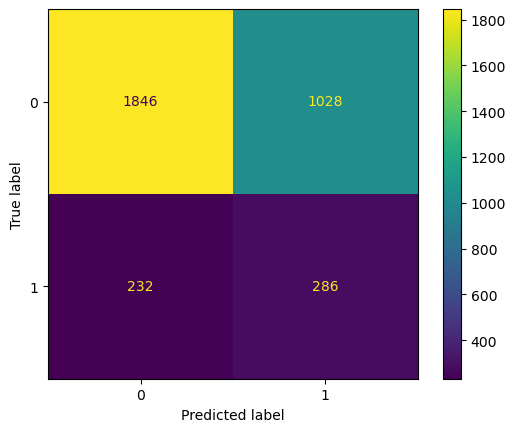

In [33]:
from imblearn.pipeline import Pipeline
estimators=[('missing', SimpleImputer(strategy='mean')),
           ('scaling', StandardScaler()),
           ('sampling', SMOTE(random_state=123)),
           ('fsel', SelectKBest(k=4)),
           ('clf', KNeighborsClassifier())]
pipe_knn_fsel= Pipeline(estimators)
df_metrics, acc= eval_cross_validation(pipe_knn_fsel, X, y)

print('Accuracy for knn after feature selection is: ', acc)
display(df_metrics)
y_pred= cross_val_predict(pipe_knn_fsel, X, y, cv=skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred)

In [34]:
knn_fsel= cross_val_score(pipe_knn_fsel, X, y, scoring= make_scorer(f1_score, pos_label=1), cv=skf)
knn_fsel, knn_fsel.mean()

(array([0.30366492, 0.33160622, 0.36065574, 0.33695652, 0.3452381 ,
        0.29834254, 0.31638418, 0.2688172 , 0.29714286, 0.26804124]),
 0.3126849514549451)

In [35]:
results= pd.DataFrame({'knn': knn, 'knn_fsel': knn_fsel})
results

,knn,knn_fsel
0,0.335260,0.303665
1,0.338983,0.331606
2,0.288889,0.360656
3,0.333333,0.336957
4,0.303797,0.345238
5,0.314607,0.298343
6,0.307692,0.316384
7,0.295858,0.268817
8,0.309392,0.297143
9,0.282486,0.268041


Text(0, 0.5, 'f1-score')

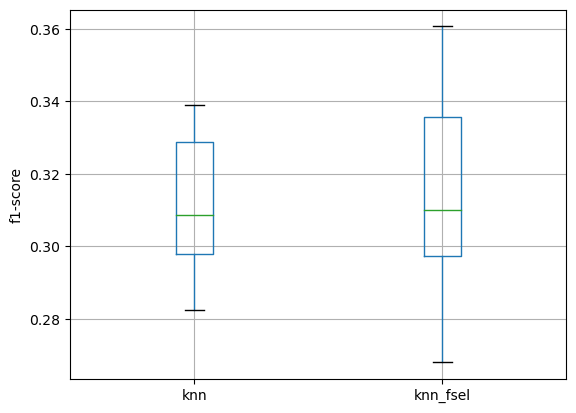

In [36]:
bplot=results.boxplot()
bplot.set_ylabel('f1-score')

In [37]:
from scipy.stats import wilcoxon
print(wilcoxon(results.knn, results.knn_fsel))

WilcoxonResult(statistic=23.0, pvalue=0.6953125)


since after the statistical test, the p-value is higher than alpha, where alpha is 0.05 (chosen arbitrarly), we can state that the two samples come from the same distribution and thus we accept the null hypothesis with a confidence level alpha.

by looking at the results, knn is the most suitble model.

# 4. Evaluate and discuss results on the test set:
- Train the selected model on the training set: *framingham_train.csv*
- Import the test set: *framingham_test.csv*
- Report and discuss the results on the test set

In [38]:
from imblearn.pipeline import Pipeline
estimators=[('missing', SimpleImputer(strategy='mean')),
           ('scaling', StandardScaler()),
           ('sampling', SMOTE(random_state=123)),
           ('clf', KNeighborsClassifier())]
pipe_knn= Pipeline(estimators)

In [40]:
df= pd.read_csv('framingham_test.csv')
df

,Unnamed: 0,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1465,0,47,1,20.0,0.0,0,1,0,325.0,160.0,95.0,32.07,95.0,87.0,0
1,302,0,55,0,0.0,0.0,0,0,0,220.0,117.5,84.0,26.20,90.0,NaN,0
2,87,0,61,1,1.0,0.0,0,1,0,326.0,200.0,104.0,38.46,57.0,78.0,0
3,843,0,46,0,0.0,0.0,0,0,0,225.0,116.0,79.0,29.21,60.0,70.0,0
4,1431,1,39,0,0.0,0.0,0,0,0,213.0,130.0,72.0,22.32,80.0,78.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,154,0,38,1,3.0,1.0,0,1,0,NaN,125.0,80.0,22.79,98.0,NaN,0
844,3994,0,54,1,10.0,0.0,0,1,0,246.0,153.0,80.0,37.30,92.0,74.0,0
845,245,1,46,1,30.0,0.0,0,1,0,253.0,147.0,85.0,30.62,100.0,75.0,0
846,4217,0,63,0,0.0,0.0,0,1,0,266.0,167.0,94.0,25.23,95.0,94.0,0


In [41]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,47,1,20.0,0.0,0,1,0,325.0,160.0,95.0,32.07,95.0,87.0,0
1,0,55,0,0.0,0.0,0,0,0,220.0,117.5,84.0,26.20,90.0,NaN,0
2,0,61,1,1.0,0.0,0,1,0,326.0,200.0,104.0,38.46,57.0,78.0,0
3,0,46,0,0.0,0.0,0,0,0,225.0,116.0,79.0,29.21,60.0,70.0,0
4,1,39,0,0.0,0.0,0,0,0,213.0,130.0,72.0,22.32,80.0,78.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,0,38,1,3.0,1.0,0,1,0,NaN,125.0,80.0,22.79,98.0,NaN,0
844,0,54,1,10.0,0.0,0,1,0,246.0,153.0,80.0,37.30,92.0,74.0,0
845,1,46,1,30.0,0.0,0,1,0,253.0,147.0,85.0,30.62,100.0,75.0,0
846,0,63,0,0.0,0.0,0,1,0,266.0,167.0,94.0,25.23,95.0,94.0,0


In [42]:
X_test, y_test = df.drop('TenYearCHD', axis=1), df['TenYearCHD']

In [43]:
estimators=[('missing', SimpleImputer(strategy='mean')),
           ('scaling', StandardScaler()),
           ('sampling', SMOTE(random_state=123)),
           ('clf', KNeighborsClassifier())]
pipe_knn= Pipeline(estimators)

In [45]:
pipe_knn.fit(X, y)

Pipeline(steps=[('missing', SimpleImputer()), ('scaling', StandardScaler()),
                ('sampling', SMOTE(random_state=123)),
                ('clf', KNeighborsClassifier())])

0.652122641509434


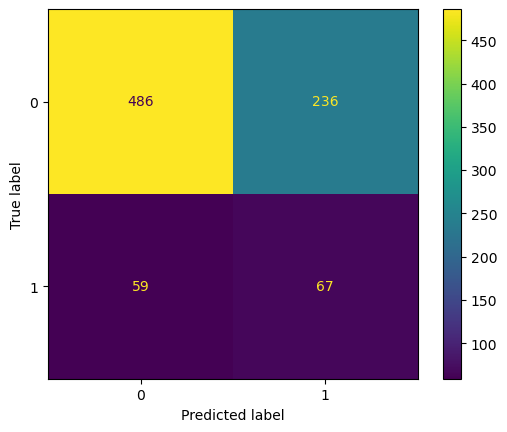

In [47]:
y_pred= pipe_knn.predict(X_test)
print(accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

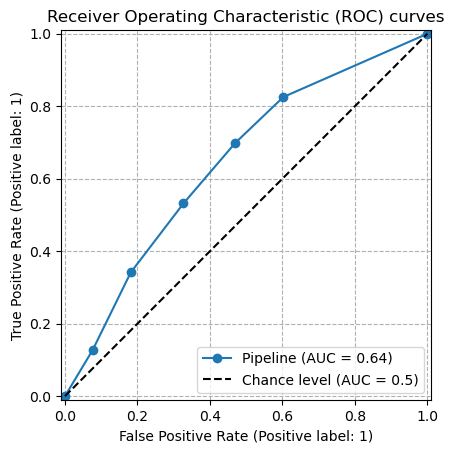

In [49]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(pipe_knn, X_test, y_test, pos_label = 1, plot_chance_level=True, marker = 'o')
plt.title("Receiver Operating Characteristic (ROC) curves")
plt.grid(linestyle="--")
plt.show()

selecting best 4 features give us better outcome by 0.01%

# Exam Delivery
- Save the current file 
- Click "**Restart & Run All**" and check consistency (no error, expected results)
- Export using
     - "**File**" --> "**Download as**" --> "**HTML (.html)**"
- Rename the files as follows and upload in MS Teams Assignment
     - HTML: *Surname_Name_StudentNumber.html*
     - IPYNB: *Surname_Name_StudentNumber.ipynb* 
